## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Processing

### Training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70296 files belonging to 38 classes.


### Validation image preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:   #the data was loaded correctly
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[105.75  97.75 110.75]
   [111.5  103.5  116.5 ]
   [110.5  102.5  115.5 ]
   ...
   [131.5  123.5  138.5 ]
   [128.   120.   135.  ]
   [125.5  117.5  132.5 ]]

  [[102.5   94.5  107.5 ]
   [104.    96.   109.  ]
   [102.75  94.75 107.75]
   ...
   [131.   123.   138.  ]
   [126.25 118.25 133.25]
   [124.   116.   131.  ]]

  [[112.75 104.75 117.75]
   [111.75 103.75 116.75]
   [107.    99.   112.  ]
   ...
   [133.5  125.5  140.5 ]
   [128.25 120.25 135.25]
   [128.5  120.5  135.5 ]]

  ...

  [[159.   153.   165.  ]
   [159.   153.   165.  ]
   [161.5  155.5  167.5 ]
   ...
   [195.25 189.25 199.25]
   [193.5  187.5  197.5 ]
   [195.5  189.5  199.5 ]]

  [[163.5  157.5  169.5 ]
   [163.   157.   169.  ]
   [164.5  158.5  170.5 ]
   ...
   [193.75 187.75 197.75]
   [191.   185.   195.  ]
   [192.5  186.5  196.5 ]]

  [[164.   158.   170.  ]
   [163.   157.   169.  ]
   [164.25 158.25 170.25]
   ...
   [195.5  189.5  199.5 ]
   [192.   186.   196.  ]
   [193.   187.   19

## Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 

In [7]:
model = Sequential()

### convolution Layer

In [31]:
model.add(Conv2D(filters= 32,kernel_size=3,padding='same', activation='relu' , input_shape=[128,128,3]))
model.add(Conv2D(filters= 32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters= 64,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters= 64,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Conv2D(filters= 128,kernel_size=3,padding='same', activation='relu' ))
model.add(Conv2D(filters= 128,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters= 256,kernel_size=3,padding='same', activation='relu' ))
model.add(Conv2D(filters= 256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
model.add(Conv2D(filters= 512,kernel_size=3,padding='same', activation='relu' ))
model.add(Conv2D(filters= 512,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Dropout(0.25))  #avoid overfitting

In [37]:
model.add(Flatten())           #a single vector
model.add(Dense(units=1500,activation='relu'))

In [38]:
model.add(Dropout(0.4))    ##reducee overfittng 

In [39]:
#output layer
model.add(Dense(units=38,activation='softmax')) # Output layer

## Compiling Model

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
##adam optimizer

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 ## Model Training

In [41]:
training_history =model.fit(x=training_set,validation_data=validation_set ,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3344s 2s/step - accuracy: 0.3982 - loss: 2.1654 - val_accuracy: 0.8258 - val_loss: 0.5611
Epoch 2/10
1041/2197 ━━━━━━━━━━━━━━━━━━━━ 25:30 1s/step - accuracy: 0.8164 - loss: 0.5804

KeyboardInterrupt: 

###### ↑validation accuracy: 95,8% & training accuracy 98,06%

## Model Evaluation

In [42]:
### tarining set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 827s 376ms/step - accuracy: 0.9002 - loss: 0.3167 


In [43]:
### validation set 
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 211s 383ms/step - accuracy: 0.8802 - loss: 0.3729


#### Saving Model

In [44]:
model.save("trained_model.keras")  

In [45]:
from tensorflow.keras.models import load_model
loaded_model = load_model("trained_model.keras") 

In [46]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

In [51]:
# Save model architecture as JSON
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

In [52]:
with open("model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()

In [53]:
training_history.history

NameError: name 'training_history' is not defined

In [54]:
### record history in json
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

NameError: name 'training_history' is not defined

In [87]:
training_history.history["val_accuracy"]

NameError: name 'training_history' is not defined

### Accuracy Visualization

In [55]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='b',label='Train Acc')
plt.plot(epochs,training_history.history['val_accuracy'],color='g',label='Val Acc')
plt.xlabel("Nmb of epochs")
plt.ylabel("Acc results")
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

In [56]:
#other metrics for evaluation
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [57]:
 test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [58]:
y_pred = model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 177s 322ms/step


array([[8.0820602e-01, 8.1306867e-02, 1.1054990e-04, ..., 6.1321366e-06,
        6.1131886e-06, 3.1034058e-04],
       [7.7500981e-01, 8.9021891e-02, 9.9942663e-06, ..., 1.6184547e-05,
        3.9475754e-06, 4.4634875e-05],
       [8.4926689e-01, 7.1813487e-03, 2.1445373e-04, ..., 2.5592507e-07,
        1.4637212e-06, 1.0330782e-04],
       ...,
       [8.1555067e-05, 2.9518105e-07, 3.0676420e-05, ..., 8.4100645e-07,
        2.1265382e-06, 9.9411798e-01],
       [7.5234566e-05, 3.0824631e-07, 1.3399182e-05, ..., 9.8808380e-07,
        5.5218175e-07, 9.9932504e-01],
       [1.6836978e-08, 3.6994912e-08, 4.1409503e-08, ..., 6.5181429e-09,
        2.3249061e-06, 9.9765331e-01]], dtype=float32)

In [59]:
predicted_categories = tf.argmax(y_pred, axis=1 )
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [66]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [67]:
Y_true =tf.argmax(true_categories , axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(Y_true,predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.65      0.77       504
                                 Apple___Black_rot       0.89      0.91      0.90       497
                          Apple___Cedar_apple_rust       0.87      0.90      0.88       440
                                   Apple___healthy       0.90      0.72      0.80       502
                               Blueberry___healthy       0.85      0.96      0.90       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.87      0.92       421
                 Cherry_(including_sour)___healthy       0.91      0.96      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.85      0.86       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.96      0.

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (Y_true, predicted_categories)
cm

array([[328,  36,   4, ...,   0,   0,   3],
       [  0, 451,   0, ...,   0,   0,   0],
       [  1,   0, 395, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 473,   0,   0],
       [  0,   0,   0, ...,   0, 417,   0],
       [  0,   0,   1, ...,   0,   0, 460]])

## Confusion matrix visual..

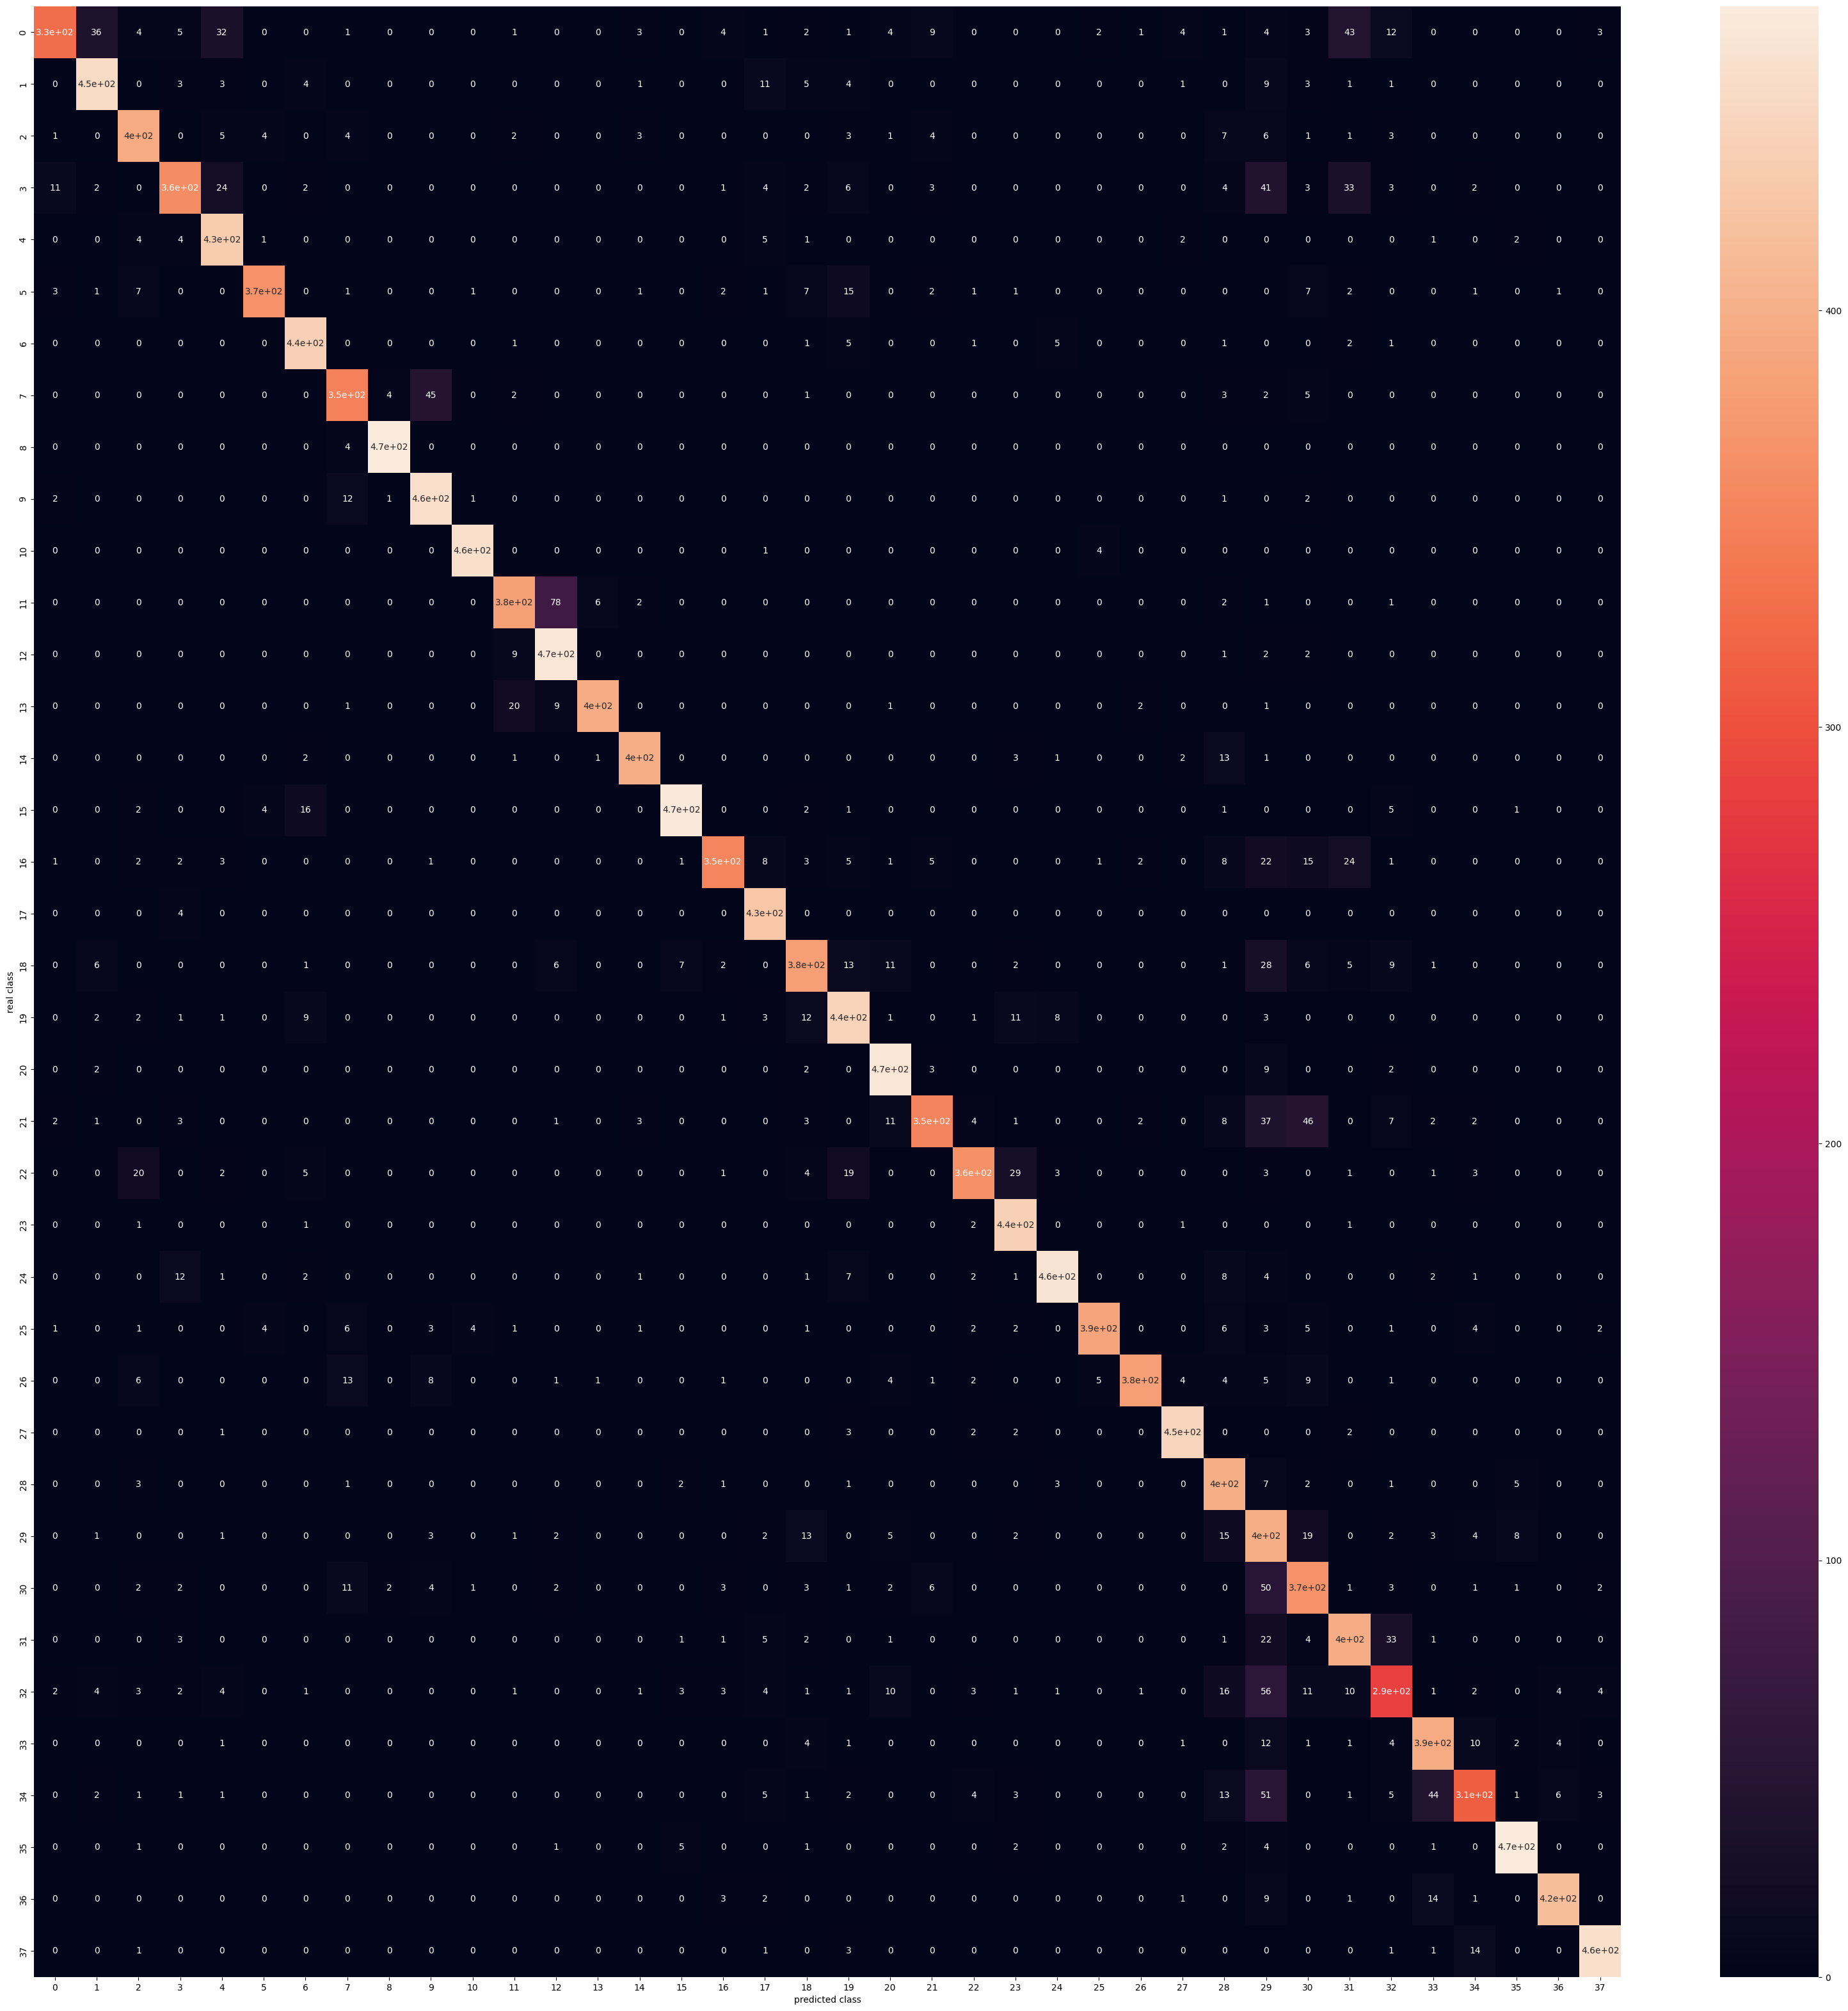

In [86]:
plt.figure(figsize =(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("predicted class")
plt.ylabel("real class")
plt.show()